In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [23]:
image = cv2.imread('shoulder.jpg',cv2.IMREAD_GRAYSCALE)

In [24]:
fourier = np.fft.fft2(image)
magnitude = 20*np.log(np.abs(np.fft.fftshift(fourier)))
phase = np.angle(np.fft.fftshift(fourier))

In [4]:
def high_pass(shape=tuple, r = float):
    M, N = shape
    H = np.zeros((M, N))

    for u in range(0, M):
        for v in range(0, N):
            D_uv = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)

            if D_uv <= r:
                H[u, v] = 1.0
            else:
                H[u, v] = 0.0

    return H

In [12]:
def guassian_high_pass(shape=tuple, r = float):
    M, N = shape
    H = np.zeros((M, N))

    for u in range(0, M):
        for v in range(0, N):
            D_uv = (u - M / 2) ** 2 + (v - N / 2) ** 2
            H[u, v] = np.exp((-D_uv/(2*(r**2))))

    return 1-H

In [13]:
def butterworth_high_pass(shape=tuple, r = float):
    M, N = shape
    H = np.zeros((M, N))

    for u in range(0, M):
        for v in range(0, N):
            D_uv = (u - M / 2) ** 2 + (v - N / 2) ** 2
            H[u, v] = 1/(1+(D_uv/(r**2)))

    return 1-H

In [26]:
high_pass_filter30 = high_pass(image.shape,30)
high_pass_filter100 = high_pass(image.shape,100)
guassian_high_pass_filter30 = guassian_high_pass(image.shape,30)
guassian_high_pass_filter100 = guassian_high_pass(image.shape,100)
butterworth_high_pass_filter30 = butterworth_high_pass(image.shape,30)
butterworth_high_pass_filter100 = butterworth_high_pass(image.shape,100)

In [27]:
fshift = np.fft.fftshift(fourier)

high30Center = fshift * high_pass_filter30
high30shift = np.fft.ifftshift(high30Center)
high30 = np.abs(np.fft.ifft2(high30shift))

high100Center = fshift * high_pass_filter100
high100shift = np.fft.ifftshift(high100Center)
high100 = np.abs(np.fft.ifft2(high100shift))

guassian30Center = fshift * guassian_high_pass_filter30
guassian30shift = np.fft.ifftshift(guassian30Center)
guassian30 = np.abs(np.fft.ifft2(guassian30shift))

guassian100Center = fshift * guassian_high_pass_filter100
guassian100shift = np.fft.ifftshift(guassian100Center)
guassian100 = np.abs(np.fft.ifft2(guassian100shift))

butterworth30Center = fshift * butterworth_high_pass_filter30
butterworth30shift = np.fft.ifftshift(butterworth30Center)
butterworth30 = np.abs(np.fft.ifft2(butterworth30shift))

butterworth100Center = fshift * butterworth_high_pass_filter100
butterworth100shift = np.fft.ifftshift(butterworth100Center)
butterworth100 = np.abs(np.fft.ifft2(butterworth100shift))

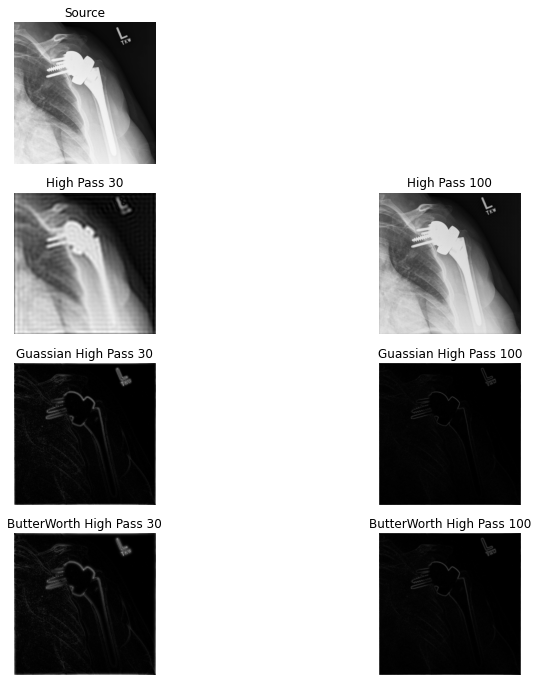

In [28]:
plt.figure(figsize=(12,12))
plt.subplot(4,2,1)
plt.axis('off')
plt.title('Source')
plt.imshow(image,cmap='gray')

plt.subplot(4,2,3)
plt.axis('off')
plt.title('High Pass 30')
plt.imshow(high30,cmap='gray')

plt.subplot(4,2,4)
plt.axis('off')
plt.title('High Pass 100')
plt.imshow(high100,cmap='gray')

plt.subplot(4,2,5)
plt.axis('off')
plt.title('Guassian High Pass 30')
plt.imshow(guassian30,cmap='gray')

plt.subplot(4,2,6)
plt.axis('off')
plt.title('Guassian High Pass 100')
plt.imshow(guassian100,cmap='gray')

plt.subplot(4,2,7)
plt.axis('off')
plt.title('ButterWorth High Pass 30')
plt.imshow(butterworth30,cmap='gray')

plt.subplot(4,2,8)
plt.axis('off')
plt.title('ButterWorth High Pass 100')
plt.imshow(butterworth100,cmap='gray')